In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import descwl
import astropy.table
import astropy.io.fits as fits
from astroML.resample import bootstrap

In [3]:
LSST_r = descwl.output.Reader('../test_LSST_r_noise').results

In [4]:
LSST_r_match = LSST_r.match_sextractor('/Users/javiers/Downloads/sextractor-2.19.5/tests/LSST_r_noise.cat');

In [5]:
LSST_r_table = astropy.table.Table.read('../test_LSST_r_noise.fits')

In [6]:
cat = LSST_r_table

In [7]:
detected, matched, indices, distance = LSST_r_match

In [8]:
print indices

[  733 41814  1481 ..., 23835 22077 23130]


In [9]:
LSST_r_table.keys()

['db_id',
 'grp_id',
 'grp_size',
 'grp_rank',
 'visible',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'f_disk',
 'f_bulge',
 'dx',
 'dy',
 'z',
 'ab_mag',
 'ri_color',
 'flux',
 'sigma_m',
 'sigma_p',
 'e1',
 'e2',
 'a',
 'b',
 'beta',
 'psf_sigm',
 'purity',
 'snr_sky',
 'snr_iso',
 'snr_grp',
 'snr_isof',
 'snr_grpf',
 'ds',
 'dg1',
 'dg2',
 'ds_grp',
 'dg1_grp',
 'dg2_grp',
 'hsm_sigm',
 'hsm_e1',
 'hsm_e2',
 'g1_fit',
 'g2_fit']

# Figure 1

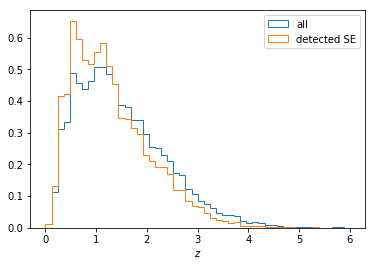

In [10]:
plt.hist(LSST_r_table['z'],range=(0,6),bins=50, normed=True, histtype='step',label='all')
plt.hist(LSST_r_table['z'][indices],range=(0,6),bins=50,normed=True,histtype='step',label='detected SE')
plt.legend()
plt.xlabel(r'$z$')

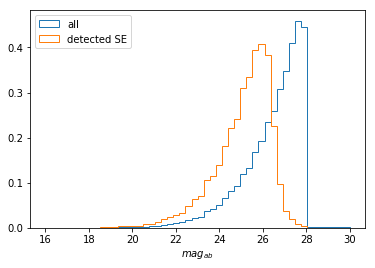

In [11]:
plt.hist(LSST_r_table['ab_mag'],range=(16,30),bins=50, normed=True, histtype='step',label='all')
plt.hist(LSST_r_table['ab_mag'][indices],range=(16,30),bins=50, normed=True, histtype='step',label='detected SE')
plt.legend(loc=2)
plt.xlabel(r'$mag_{ab}$')

0.387226


(0, 3)

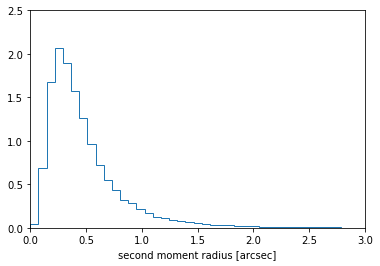

In [12]:
plt.hist(LSST_r_table['sigma_p']*np.sqrt(2),range=(0,3),bins=41, normed=True, histtype='step',label='all')
#plt.hist(LSST_r_table['sigma_p'][indices]*np.sqrt(2),range=(0,3),bins=50, normed=True, histtype='step',label='detected SE')
plt.xlabel('second moment radius [arcsec]')
print np.median(LSST_r_table['sigma_p']*np.sqrt(2))
plt.ylim(0,2.5)
plt.xlim(0,3)

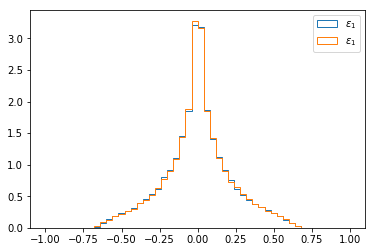

In [13]:
plt.hist(LSST_r_table['e1'],bins=50,range=(-1,1),normed=True,histtype='step',label=r'$\epsilon_{1}$')
plt.hist(LSST_r_table['e2'],bins=50,range=(-1,1),normed=True,histtype='step',label=r'$\epsilon_{1}$')
plt.legend()

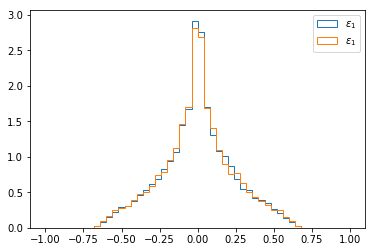

In [14]:
plt.hist(LSST_r_table['e1'][indices],bins=50,range=(-1,1),normed=True,histtype='step',label=r'$\epsilon_{1}$')
plt.hist(LSST_r_table['e2'][indices],bins=50,range=(-1,1),normed=True,histtype='step',label=r'$\epsilon_{1}$')
plt.legend()

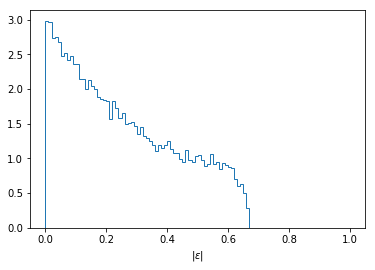

In [15]:
plt.hist(np.sqrt(LSST_r_table['e1']**2+LSST_r_table['e2']**2),bins=100,range=(0,1),normed=True, histtype='step')
plt.xlabel(r'$|\epsilon|$')

# Figure 3(a)

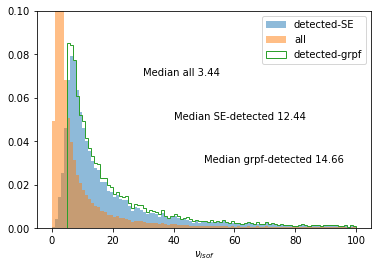

In [16]:
det_grpf = LSST_r_table['snr_grpf'] > 5
plt.hist(LSST_r_table['snr_isof'][indices],normed=True, bins=100, range=(0,100), alpha=0.5, label='detected-SE')
plt.hist(LSST_r_table['snr_isof'],normed=True, bins=100, range=(0,100), alpha=0.5, label='all')
plt.hist(LSST_r_table['snr_isof'][det_grpf],normed=True, bins=100, range=(0,100), label='detected-grpf',histtype='step')
plt.legend()
plt.ylim(0,0.1)
plt.xlabel(r'$\nu_{isof}$')
plt.annotate('Median all %.2f' % np.median(LSST_r_table['snr_isof']),xy=(30,0.07))
plt.annotate('Median SE-detected %.2f' % np.median(LSST_r_table['snr_isof'][indices]),xy=(40,0.05))
plt.annotate('Median grpf-detected %.2f' % np.median(LSST_r_table['snr_isof'][det_grpf]), xy=(50,0.03))

# Figure 3(b)

The relevant expressions are:

$$r_{sec} = \frac{\int_{0}^{2\pi}{\int_{0}^{\infty}{r^{2}I(r) rdr d\theta}}}{\int_{0}^{2\pi}{\int_{0}^{\infty}{I(r) r dr d\theta}}}$$

$$r_{sec} = \sqrt{ f_{b} r^{2}_{sec,b} + \left(1-f_{b}\right) r_{sec,d}^{2} }$$

$$r_{PSF} = \frac{\sqrt{2} r_{seeing}}{2\sqrt{2 \ln{2}}}$$

$$r_{gal} = \sqrt{r_{g}^{2} - r_{g,star}^{2}}$$

$r_{g}$ is the measured second moment radius from `IMCAT`, and $r_{g,star}=r_{PSF}$

$$ R = \frac{r_{gal}^{2}}{r_{PSF}^{2}} = \frac{r^{2}_{g}}{r^{2}_{PSF}}-1 $$

0.606402083936


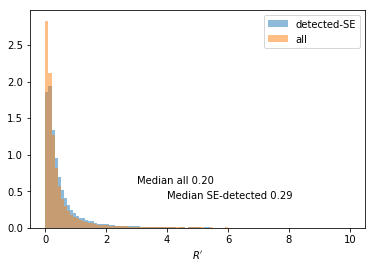

In [48]:
r_psf = fits.open('../test_LSST_r.fits')[0].header['PSF_SIGP']
print r_psf
R = LSST_r_table['sigma_p']**2/r_psf**2
plt.hist(R[indices],bins=100,range=(0,10),label='detected-SE',alpha=0.5, normed=True)
plt.hist(R,bins=100,range=(0,10),label='all',alpha=0.5, normed=True)
#plt.hist(R[det_grpf],bins=100,range=(0,10), label='detected-grpf', normed=True,histtype='step')
plt.annotate('Median all %.2f' % np.median(R),xy=(3,0.6))
plt.annotate('Median SE-detected %.2f' % np.median(R[indices]),xy=(4,0.4))
#plt.annotate('Median grpf-detected %.2f' % np.median(R[det_grpf]), xy=(5,0.2))
plt.xlabel(r'$R^{\prime}$')
plt.legend(loc='best')
plt.savefig('/Users/javiers/r_orig.pdf')

0.257515254814


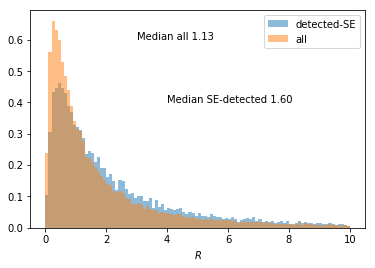

In [43]:
r_psf = fits.open('../test_LSST_r.fits')[0].header['PSF_SIGP']
r_psf = r_psf/(2.*np.sqrt(2.*np.log(2)))
print r_psf
R_test = LSST_r_table['sigma_p']**2/r_psf**2
plt.hist(R_test[indices],bins=100,range=(0,10),label='detected-SE',alpha=0.5, normed=True)
plt.hist(R_test,bins=100,range=(0,10),label='all',alpha=0.5, normed=True)
#plt.hist(R_test[det_grpf],bins=100,range=(0,10), label='detected-grpf',normed=True,histtype='step')
plt.annotate('Median all %.2f' % np.median(R_test),xy=(3,0.6))
plt.annotate('Median SE-detected %.2f' % np.median(R_test[indices]),xy=(4,0.4))
#plt.annotate('Median grpf-detected %.2f' % np.median(R_test[det_grpf]), xy=(5,0.2))
plt.xlabel(r'$R$')
plt.legend(loc='best')
plt.savefig('/Users/javiers/r_corrected.pdf')

# As in the paper

0.537158271069


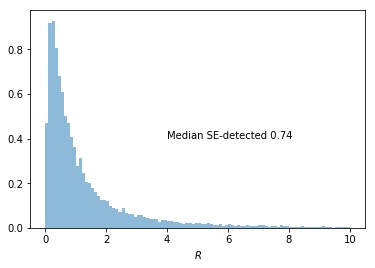

In [19]:
r_psf = np.sqrt(0.8**2+0.4**2)/(2.*np.sqrt(np.log(2)))
print r_psf
R_pap = 2*LSST_r_table['sigma_p']**2/r_psf**2
plt.hist(R_pap[indices],bins=100,range=(0,10),label='detected-SE',alpha=0.5, normed=True)
#plt.hist(R_pap,bins=100,range=(0,10),label='all',alpha=0.5, normed=True)
#plt.hist(R_pap[det_grpf],bins=100,range=(0,10), label='detected-grpf',normed=True,histtype='step')
#plt.annotate('Median all %.2f' % np.median(R_pap),xy=(3,0.6))
plt.annotate('Median SE-detected %.2f' % np.median(R_pap[indices]),xy=(4,0.4))
#plt.annotate('Median grpf-detected %.2f' % np.median(R_pap[det_grpf]), xy=(5,0.2))
plt.xlabel(r'$R$')

# Figure 4

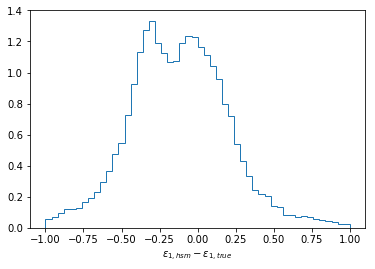

In [20]:
plt.hist(LSST_r_table['hsm_e1']-LSST_r_table['e1'],bins=50,range=(-1,1),histtype='step',normed=True)
plt.xlabel(r'$\epsilon_{1,hsm}-\epsilon_{1,true}$')

# Figure 4 (with $\nu \sim 15, R \sim 1$)

190


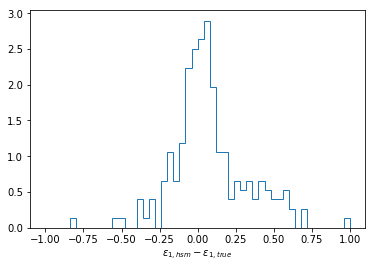

In [21]:
test_cut = (LSST_r_table['snr_iso'] > 13) & (LSST_r_table['snr_iso'] < 17) & (R>0.75) & (R<1.25)
print np.count_nonzero(test_cut)
plt.hist(LSST_r_table['hsm_e1'][test_cut]-LSST_r_table['e1'][test_cut],bins=50,range=(-1,1),histtype='step',normed=True)
plt.xlabel(r'$\epsilon_{1,hsm}-\epsilon_{1,true}$')

# $R$ vs $\nu$

/Users/javiers/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: Mean of empty slice
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: Mean of empty slice


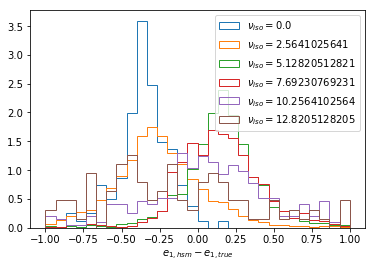

In [22]:
sigma_hsm1 = []
sigma_hsm2 = []
nan_frac = []
err_sigma_hsm1 = []
err_sigma_hsm2 = []
nbins_r = 40
nbins_nu = 40
r_vec = np.linspace(0,10,nbins_r)
nu_vec = np.linspace(0,100,nbins_nu)
r_grid, nu_grid = np.meshgrid(r_vec,nu_vec)
for rr in r_vec:
    rsel = (R>rr-5./nbins_r) & (R<rr+5./nbins_r)
    for nn in nu_vec:
        nusel = (cat['snr_isof']>nn-50./nbins_nu) & (cat['snr_isof']<nn+50./nbins_nu)
        sel = rsel & nusel
        if (rr==0) & (nn<15) :
            plt.hist(cat['hsm_e1'][sel]-cat['e1'][sel],range=(-1,1),bins=30,histtype='step',normed=True, label=r'$\nu_{iso}=$'+str(nn))
        #print np.count_nonzero(sel)
        #plt.hist(cat['hsm_e1'][sel]-cat['e1'][sel],range=(-1,1),bins=30)
        #print np.var(cat['hsm_e1'][sel]-cat['e1'][sel])
        nbb = 100
        if np.count_nonzero(sel)<nbb:
            nbb = np.count_nonzero(sel)
        if nbb>0:
            std1 = bootstrap(cat['hsm_e1'][sel]-cat['e1'][sel], nbb,  np.nanstd, kwargs=dict(axis=1, ddof=1))
            std2 = bootstrap(cat['hsm_e2'][sel]-cat['e2'][sel], nbb,  np.nanstd, kwargs=dict(axis=1, ddof=1))
            sigma_hsm1.append(np.nanmean(std1))
            sigma_hsm2.append(np.nanmean(std2))
            err_sigma_hsm1.append(np.nanstd(std1))
            err_sigma_hsm2.append(np.nanstd(std2))
        else:
            sigma_hsm1.append(np.nan)
            sigma_hsm2.append(np.nan)
            err_sigma_hsm1.append(np.nan)
            err_sigma_hsm2.append(np.nan)
        if np.count_nonzero(sel)>0:
            nan_frac.append(np.count_nonzero(np.logical_or(np.isnan(cat['hsm_e1'][sel]),np.isnan(cat['hsm_e2'][sel])))*1.0/np.count_nonzero(sel))
        else:
            nan_frac.append(0.)
#print sigma_hsm1
plt.legend()
plt.xlabel('$e_{1,hsm}-e_{1,true}$')
sigma_hsm1=np.array(sigma_hsm1).reshape(nbins_r,nbins_nu)
sigma_hsm2=np.array(sigma_hsm2).reshape(nbins_r,nbins_nu)
err_sigma_hsm1=np.array(err_sigma_hsm1).reshape(nbins_r,nbins_nu)
err_sigma_hsm2=np.array(err_sigma_hsm2).reshape(nbins_r,nbins_nu)
nan_frac = np.array(nan_frac).reshape(nbins_r,nbins_nu)

(1600,) (1600,) (1600,)


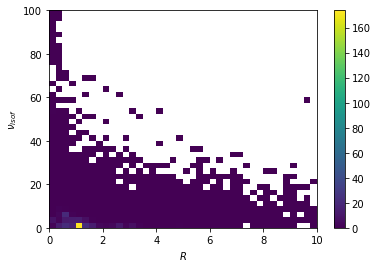

In [23]:
print r_grid.flatten().shape, nu_grid.flatten().shape, sigma_hsm1.flatten().shape
plt.hist2d(r_grid.flatten(),nu_grid.flatten(),weights=sigma_hsm1.flatten(),bins=(nbins_r,nbins_nu),range=((0,10),(0,100)))
plt.xlabel('$R$')
plt.ylabel(r'$\nu_{isof}$')
plt.colorbar()

# Error vs SNR

# $R \sim 1$

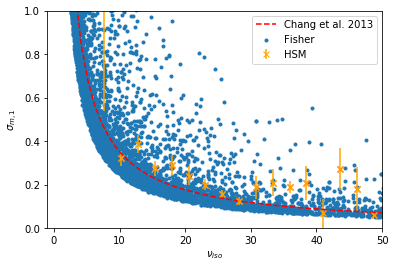

In [34]:
rmin = 2.0
rmax = 4.0
r_psf_p = r_psf/(2.*np.sqrt(2.*np.log(2)))
Rp = LSST_r_table['sigma_p']**2/r_psf_p**2
Rcut = np.logical_and(Rp>rmin,Rp<rmax)
rbin = 0.5*rmax+0.5*rmin
factor = 8.*np.log(2)
good = (r_grid>=rmin/factor) & (r_grid<=rmax/factor) & (nan_frac<0.1)
bad = (r_grid>=rmin/factor) & (r_grid<=rmax/factor) & (nan_frac>=0.1)
plt.scatter(cat['snr_iso'][Rcut],cat['dg1'][Rcut],marker='.',label='Fisher')
plt.scatter(nu_grid[good],sigma_hsm1[good],marker='x')
plt.errorbar(nu_grid[good],sigma_hsm1[good],err_sigma_hsm1[good],fmt='x',color='orange',label='HSM')
plt.scatter(nu_grid[bad],sigma_hsm1[bad],marker='+')
a= 1.58
b = 5.03
c = 0.39
xvec = np.linspace(0.1,50)
dg1_fit = a/xvec*(1+(b/rbin)**c)
plt.plot(xvec,dg1_fit,'r--',label='Chang et al. 2013')
plt.xlim(-1,50)
plt.ylim(0,1.0)
plt.xlabel(r'$\nu_{iso}$')
plt.ylabel(r'$\sigma_{m,1}$')
plt.legend(loc='best')
plt.savefig('/Users/javiers/error_comparison.pdf')

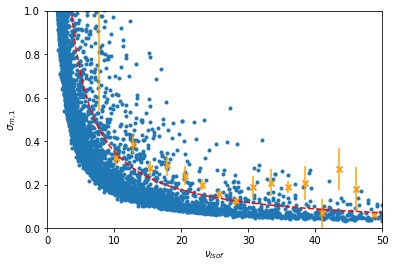

In [28]:
plt.scatter(cat['snr_isof'][Rcut],cat['dg1'][Rcut],marker='.')
plt.scatter(nu_grid[(r_grid>=rmin/factor) & (r_grid<=rmax/factor)],sigma_hsm1[(r_grid>=rmin/factor) & (r_grid<=rmax/factor)],marker='x')
plt.errorbar(nu_grid[good],sigma_hsm1[good],err_sigma_hsm1[good],fmt='.',color='orange')
plt.plot(xvec,dg1_fit,'r--')
plt.xlim(0,50)
plt.ylim(0,1.0)
plt.xlabel(r'$\nu_{isof}$')
plt.ylabel(r'$\sigma_{m,1}$')


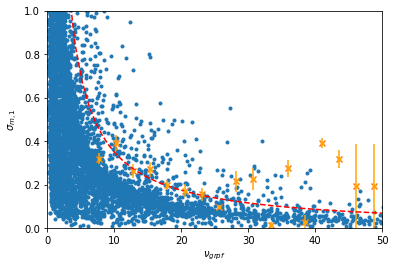

In [315]:
plt.scatter(cat['snr_grpf'][Rcut],cat['dg1'][Rcut],marker='.')
plt.scatter(nu_grid[(r_grid>=rmin/factor) & (r_grid<=rmax/factor)],sigma_hsm1[(r_grid>=rmin/factor) & (r_grid<=rmax/factor)],marker='x')
plt.errorbar(nu_grid[good],sigma_hsm1[good],err_sigma_hsm1[good],fmt='.',color='orange')
plt.plot(xvec,dg1_fit,'r--')
plt.xlim(0,50)
plt.ylim(0,1.0)
plt.xlabel(r'$\nu_{grpf}$')
plt.ylabel(r'$\sigma_{m,1}$')

# $\nu_{iso} \sim 10$

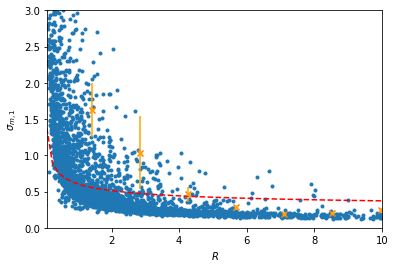

In [36]:
numin = 6
numax = 9
nucut = np.logical_and(LSST_r_table['snr_isof'] > numin,LSST_r_table['snr_isof']<numax)
plt.scatter(Rp[nucut],LSST_r_table['dg1'][nucut],marker='.')
plt.scatter(r_grid[(nu_grid>=numin) &(nu_grid<=numax)]*factor,sigma_hsm1[(nu_grid>=numin) &(nu_grid<=numax)],marker='x')
plt.errorbar(r_grid[(nu_grid>=numin) &(nu_grid<=numax)]*factor,sigma_hsm1[(nu_grid>=numin) &(nu_grid<=numax)],
             err_sigma_hsm1[(nu_grid>=numin) &(nu_grid<=numax)],fmt='.',color='orange')
nubin = 0.5*numin+0.5*numax
xvec = np.linspace(0.05,10)
dg1_fit_r = a/nubin*(1+(b/xvec)**c)
plt.plot(xvec,dg1_fit_r,'r--')
plt.xlim(1e-1,10)
plt.ylim(0.,3.0)
plt.xlabel('$R$')
plt.ylabel(r'$\sigma_{m,1}$')
#plt.xscale('log')

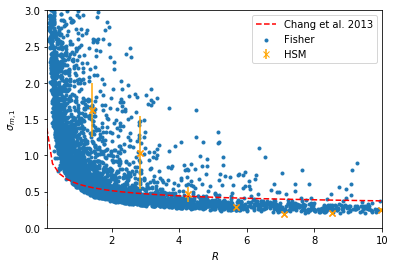

In [38]:
nucut = np.logical_and(LSST_r_table['snr_iso'] > numin,LSST_r_table['snr_iso']<numax)
plt.scatter(Rp[nucut],LSST_r_table['dg1'][nucut],marker='.', label='Fisher')
plt.scatter(r_grid[(nu_grid>=numin) &(nu_grid<=numax)]*factor,sigma_hsm1[(nu_grid>=numin) &(nu_grid<=numax)],marker='x')
plt.errorbar(r_grid[(nu_grid>=numin) &(nu_grid<=numax)]*factor,sigma_hsm1[(nu_grid>=numin) &(nu_grid<=numax)],
             err_sigma_hsm1[(nu_grid>=numin) &(nu_grid<=numax)],fmt='x',color='orange',label='HSM')
plt.plot(xvec,dg1_fit_r,'r--',label='Chang et al. 2013')
plt.xlim(1e-1,10)
plt.ylim(0.,3.0)
plt.xlabel('$R$')
plt.ylabel(r'$\sigma_{m,1}$')
plt.legend(loc='best')
#plt.xscale('log')
plt.savefig('/Users/javiers/error_comparison_r.pdf')

# Testing $n_{eff}$

In [283]:
intrinsic_var = 0.5*(np.var(cat['e1']) + np.var(cat['e2']))
intrinsic_var2 = 0.5*(np.var(cat['e1'][indices]) + np.var(cat['e2'][indices]))
intrinsic_var3 = 0.26**2

In [284]:
print intrinsic_var, intrinsic_var2, intrinsic_var3

0.0492056123912 0.0563587471843 0.0676


In [285]:
wgt = 0.5*(intrinsic_var/(intrinsic_var+cat['dg1']**2)+intrinsic_var/(intrinsic_var+cat['dg2']**2))
wgt2 = 0.5*(intrinsic_var2/(intrinsic_var2+cat['dg1']**2)+intrinsic_var2/(intrinsic_var2+cat['dg2']**2))
wgt3 = 0.5*(intrinsic_var3/(intrinsic_var3+cat['dg1']**2)+intrinsic_var3/(intrinsic_var3+cat['dg2']**2))


In [286]:
sm12 = np.sqrt(0.5*cat['dg1']**2+0.5*cat['dg2']**2)
sm = np.sqrt((cat['dg1']**2*cat['dg2']**2+intrinsic_var*sm12**2)/(intrinsic_var+sm12**2))
pes = sm < 0.5*np.sqrt(intrinsic_var)
fid = sm < np.sqrt(intrinsic_var)
op = sm < 2.*np.sqrt(intrinsic_var)

In [287]:
sm12 = np.sqrt(0.5*cat['dg1']**2+0.5*cat['dg2']**2)
sm2 = np.sqrt((cat['dg1']**2*cat['dg2']**2+intrinsic_var2*sm12**2)/(intrinsic_var2+sm12**2))
pes2 = sm < 0.5*np.sqrt(intrinsic_var2)
fid2 = sm < np.sqrt(intrinsic_var2)
op2 = sm < 2.*np.sqrt(intrinsic_var2)

In [288]:
sm12 = np.sqrt(0.5*cat['dg1']**2+0.5*cat['dg2']**2)
sm3 = np.sqrt((cat['dg1']**2*cat['dg2']**2+intrinsic_var3*sm12**2)/(intrinsic_var3+sm12**2))
pes3 = sm < 0.5*np.sqrt(intrinsic_var3)
fid3 = sm < np.sqrt(intrinsic_var3)
op3 = sm < 2.*np.sqrt(intrinsic_var3)

In [289]:
a= 1.58
b = 5.03
c = 0.39
sigma_m_fit = a/cat['snr_iso']*(1+(b/R)**c)
sigma_m_fit_test = a/cat['snr_iso']*(1+b/R_test)**c

### Comparison fit formula $r_{psf}=\sqrt{2}\sigma_{+}$ and SE intrinsic variance of SE detected objects

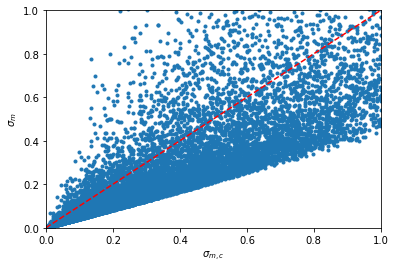

In [290]:
plt.scatter(sigma_m_fit[indices],sm[indices],marker='.')
plt.plot(np.linspace(0,1),np.linspace(0,1),'r--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel(r'$\sigma_{m,c}$')
plt.ylabel(r'$\sigma_{m}$')

### Comparison fit formula $r_{psf}=\sqrt{2}\sigma_{+,psf}/2\sqrt{2\ln{2}}$ and SE intrinsic variance for SE detected objects


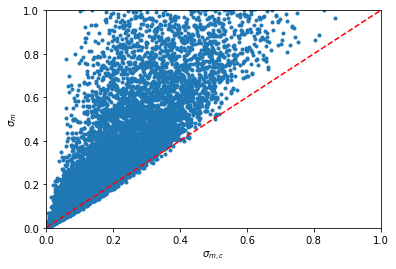

In [291]:
plt.scatter(sigma_m_fit_test[indices],sm[indices],marker='.')
plt.plot(np.linspace(0,1),np.linspace(0,1),'r--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel(r'$\sigma_{m,c}$')
plt.ylabel(r'$\sigma_{m}$')

### Comparison fit formula $r_{psf}=\sqrt{2}\sigma_{+,psf}/2\sqrt{2\ln{2}}$ and $\nu_{grpf} > 5$ intrinsic variance for objects with $\nu_{grpf} > 5$

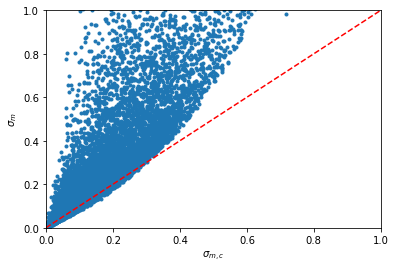

In [292]:
plt.scatter(sigma_m_fit_test[det_grpf],sm2[det_grpf],marker='.')
plt.plot(np.linspace(0,1),np.linspace(0,1),'r--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel(r'$\sigma_{m,c}$')
plt.ylabel(r'$\sigma_{m}$')

### Comparison fit formula $r_{psf}=\sqrt{2}\sigma_{+,psf}$ and for objects with $\nu_{grpf} > 5$ with $\sigma_{SN}=\sigma_{I}=0.26$

In [293]:
from matplotlib.colors import LogNorm

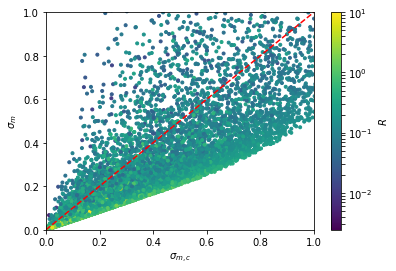

In [294]:
plt.scatter(sigma_m_fit[det_grpf],sm3[det_grpf],marker='.',c=R[det_grpf],vmax=10,norm=LogNorm())
plt.colorbar(label='$R$')
plt.plot(np.linspace(0,1),np.linspace(0,1),'r--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel(r'$\sigma_{m,c}$')
plt.ylabel(r'$\sigma_{m}$')

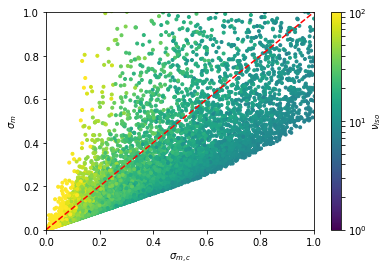

In [295]:
plt.scatter(sigma_m_fit[det_grpf],sm[det_grpf],marker='.',c=cat['snr_iso'][det_grpf],vmax=100,vmin=1,norm=LogNorm())
plt.colorbar(label=r'$\nu_{iso}$')
plt.plot(np.linspace(0,1),np.linspace(0,1),'r--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel(r'$\sigma_{m,c}$')
plt.ylabel(r'$\sigma_{m}$')

All galaxies

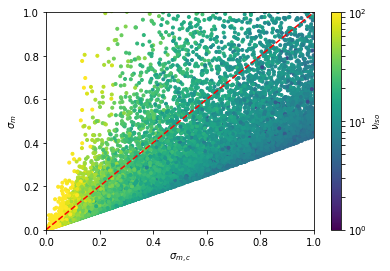

In [296]:
plt.scatter(sigma_m_fit,sm,marker='.',c=cat['snr_iso'],vmax=100,norm=LogNorm(),vmin=1)
plt.colorbar(label=r'$\nu_{iso}$')
plt.plot(np.linspace(0,1),np.linspace(0,1),'r--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel(r'$\sigma_{m,c}$')
plt.ylabel(r'$\sigma_{m}$')

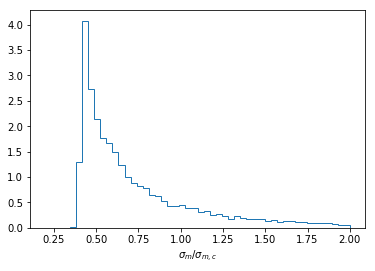

In [297]:
plt.hist(sm[indices]/sigma_m_fit[indices],range=(2e-1,2),bins=50,histtype='step',normed=True)
plt.xlabel('$\sigma_{m}/\sigma_{m,c}$')

$r_{gal} \approx 0.4"$, $R \approx 1.63$ $\Rightarrow$ $r_{PSF} \approx 0.4/\sqrt{1.63} \approx 0.31"$ $\Rightarrow$ $FWHM \approx 0.52"$

On the other hand:

$r_{PSF} = FWHM/2\sqrt{\ln{2}}$

$FWHM \approx \sqrt{0.8^2+0.4^2} \approx 0.894"$

In [298]:
0.4/np.sqrt(1.63)

0.31330417999518295

In [299]:
np.sqrt(0.8**2+0.4**2)

0.89442719099991597

In [300]:
np.sqrt(2)*np.sqrt(0.8**2+0.4**2)/(2*np.sqrt(2*np.log(2)))

0.53715827106895864

In [301]:
0.75/(2*np.sqrt(np.log(2)))

0.45042090329491868

In [302]:
0.7/(2*np.sqrt(np.log(2)))

0.42039284307525743

In [303]:
xtest = 1+np.random.normal(size=2000)
xtest2 = np.random.chisquare(2,size=2000)

In [304]:
xtest3 = xtest2/xtest
print np.median(xtest3)
print np.median(xtest)
print np.median(xtest2)
print np.median(xtest2)/np.median(xtest)

0.994936678097
1.0360444727
1.44839383025
1.39800353017


(array([ 1001.,   509.,   243.,   130.,    63.,    24.,    14.,    12.,
            2.,     2.]),
 array([  4.00610388e-03,   1.45263795e+00,   2.90126980e+00,
          4.34990164e+00,   5.79853349e+00,   7.24716533e+00,
          8.69579718e+00,   1.01444290e+01,   1.15930609e+01,
          1.30416927e+01,   1.44903246e+01]),
 <a list of 10 Patch objects>)

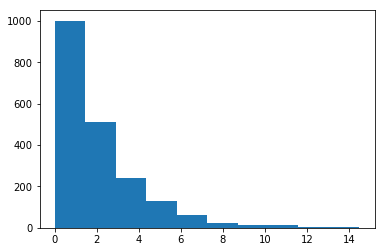

In [305]:
plt.hist(xtest2)

(array([    2.,     4.,    12.,  1970.,     6.,     4.,     0.,     0.,
            0.,     2.]),
 array([-457.36002895, -326.26967952, -195.1793301 ,  -64.08898067,
          67.00136875,  198.09171818,  329.18206761,  460.27241703,
         591.36276646,  722.45311589,  853.54346531]),
 <a list of 10 Patch objects>)

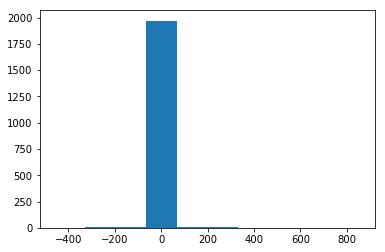

In [306]:
plt.hist(xtest3)

(array([   3.,   20.,   83.,  290.,  469.,  537.,  372.,  173.,   37.,   16.]),
 array([-2.50852833, -1.8323876 , -1.15624687, -0.48010614,  0.19603459,
         0.87217532,  1.54831604,  2.22445677,  2.9005975 ,  3.57673823,
         4.25287896]),
 <a list of 10 Patch objects>)

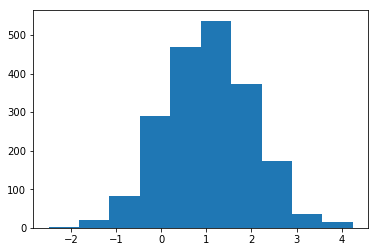

In [307]:
plt.hist(xtest)

In [308]:
table_COSMOS = astropy.table.Table.read('/Users/javiers/Documents/COSMOS/cosmos_tab.fits.gz')

In [149]:
table_COSMOS.keys()

['number',
 'mag_iso',
 'magerr_iso',
 'mag_isocor',
 'magerr_isocor',
 'mag_petro',
 'magerr_petro',
 'petro_radius',
 'mag_aper',
 'magerr_aper',
 'mag_auto',
 'magerr_auto',
 'mag_best',
 'magerr_best',
 'flux_auto',
 'fluxerr_auto',
 'kron_radius',
 'background',
 'threshold',
 'flux_max',
 'flux_radius',
 'isoarea_image',
 'x_image',
 'y_image',
 'xmin_image',
 'ymin_image',
 'xmax_image',
 'ymax_image',
 'xpeak_image',
 'ypeak_image',
 'alphapeak_j2000',
 'deltapeak_j2000',
 'a_image',
 'b_image',
 'ra',
 'dec',
 'theta_image',
 'mu_threshold',
 'mu_max',
 'isoarea_world',
 'x_world',
 'y_world',
 'a_world',
 'b_world',
 'theta_world',
 'flags',
 'fwhm_image',
 'fwhm_world',
 'cxx_image',
 'cyy_image',
 'cxy_image',
 'elongation',
 'class_star',
 'field',
 'mu_class',
 'x',
 'y',
 'z',
 'spt_ind',
 'cntr']

In [195]:
Ixx = table_COSMOS['cxx_image']
Iyy = table_COSMOS['cyy_image']
Ixy = table_COSMOS['cxy_image']
jimag = np.complex(0,1)
Qtrace = Ixx*Iyy-Ixy**2
rdenom = Qtrace >= 0
imdenom = Qtrace < 0
denom = np.zeros_like(Ixx,dtype=complex)
denom[rdenom] = Ixx[rdenom]+Iyy[rdenom]+2*np.sqrt(Qtrace[rdenom])
denom[imdenom] = Ixx[imdenom]+Iyy[imdenom]+2*jimag*np.sqrt(-Qtrace[imdenom])
epsilon = (Ixx-Iyy+2*jimag*Ixy)/denom
e1 = np.real(epsilon)
e2 = np.imag(epsilon)
emod = np.sqrt(e1**2+e2**2)
print np.where(np.imag(e1)!=0)
print np.where(np.imag(e2)!=0)

(array([], dtype=int64),)
(array([], dtype=int64),)


In [238]:
d = np.sqrt(0.5*(Ixx+Iyy))
dcut = d> 3.5*0.066
ecut = emod < 0.99
sncut = table_COSMOS['flux_auto']/table_COSMOS['fluxerr_auto']>4.5
star_cut = table_COSMOS['mu_class']==1
print np.count_nonzero(ecut), np.count_nonzero(dcut), np.count_nonzero(sncut)
lens_cut = (sncut) & (ecut) & (dcut) & (star_cut)

1001180 1063207 795736


In [239]:
print np.count_nonzero(lens_cut)

543708


In [327]:
e1_catsim_noise = LSST_r_table['e1']+np.random.normal(0,LSST_r_table['dg1'])
e2_catsim_noise = LSST_r_table['e2']+np.random.normal(0,LSST_r_table['dg2'])
emod_catsim_noise = np.sqrt(e1_catsim_noise**2+e2_catsim_noise**2)

In [339]:
e1_catsim_cosmos = LSST_r_table['e1']+np.random.normal(0,LSST_r_table['dg1']/2.)
e2_catsim_cosmos = LSST_r_table['e2']+np.random.normal(0,LSST_r_table['dg2']/2.)
emod_catsim_cosmos = np.sqrt(e1_catsim_cosmos**2+e2_catsim_cosmos**2)

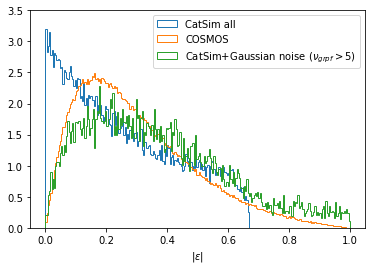

In [354]:
plt.hist(np.sqrt(LSST_r_table['e1']**2+LSST_r_table['e2']**2),bins=250,range=(0,1),normed=True, histtype='step',label='CatSim all')
plt.hist(emod[lens_cut],bins=250,range=(0,1),normed=True, histtype='step',label='COSMOS')
#plt.hist(np.sqrt(LSST_r_table['hsm_e1']**2+LSST_r_table['hsm_e2']**2)[LSST_r_table['snr_grpf']>5],bins=250,range=(0,1),normed=True, histtype='step',label=r'HSM-noisy stamps ($\nu_{grpf}>5$)')
plt.hist(emod_catsim_noise[LSST_r_table['snr_grpf']>5],bins=250,range=(0,1),normed=True, histtype='step',label=r'CatSim+Gaussian noise ($\nu_{grpf}>5$)')
#plt.hist(emod_catsim_cosmos[LSST_r_table['snr_grpf']>5],bins=250,range=(0,1),normed=True, histtype='step',label='CatSim+Gaussian noise ($\nu_{grpf}>5$)')
plt.xlabel(r'$|\epsilon|$')
plt.ylim(0,3.5)
plt.legend()

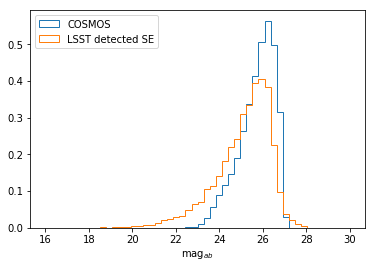

In [241]:
plt.hist(table_COSMOS['mag_auto'][lens_cut],bins=50,range=(16,30),histtype='step', normed=True, label='COSMOS')
plt.hist(LSST_r_table['ab_mag'][indices],range=(16,30),bins=50, normed=True, histtype='step',label='LSST detected SE')
#plt.hist(LSST_r_table['ab_mag'],range=(16,30),bins=50, normed=True, histtype='step',label='all')
plt.legend(loc=2)
plt.xlabel(r'mag$_{ab}$')

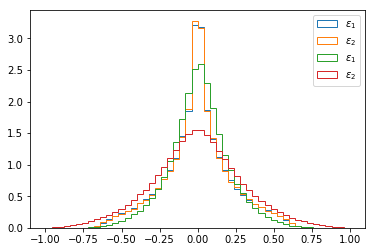

In [242]:
plt.hist(LSST_r_table['e1'],bins=50,range=(-1,1),normed=True,histtype='step',label=r'$\epsilon_{1}$')
plt.hist(LSST_r_table['e2'],bins=50,range=(-1,1),normed=True,histtype='step',label=r'$\epsilon_{2}$')
plt.hist(e1[lens_cut],bins=50,range=(-1,1),normed=True,histtype='step',label=r'$\epsilon_{1}$')
plt.hist(e2[lens_cut],bins=50,range=(-1,1),normed=True,histtype='step',label=r'$\epsilon_{2}$')
plt.legend()